In [83]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In [84]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

In [85]:
target_domain_samples = 16

# No confounders in target- and test-data

In this case there are 512 samples from the source domain (with correlating confounders) and 64 samples from the target domain (with no confounders).

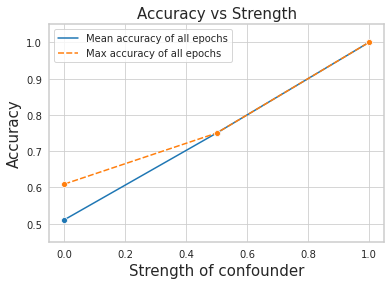

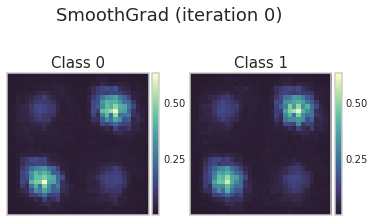

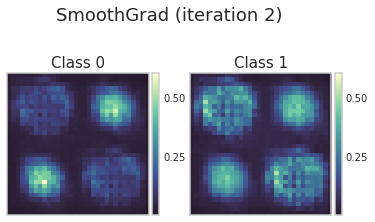

In [86]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=0, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])

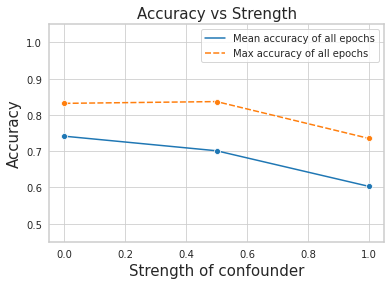

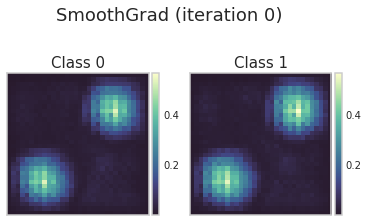

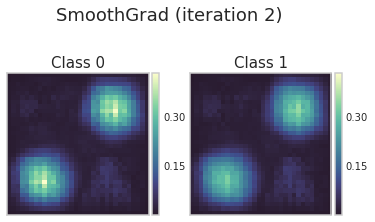

In [87]:
c = CI.confounder()
model = Models.SimpleConv_DANN()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=0, train_confounding=0, test_confounding=np.arange(0, 1.01, 0.5), params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])

# De-correlated confounders in target- and test-data

In this case there are confounders present in the data from target domain and test-set but they are de-correlated with the real features (they are rather distributed by pure chance). This is more representative of real world examples.

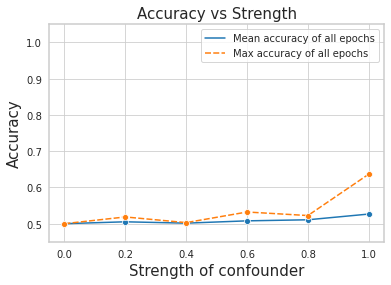

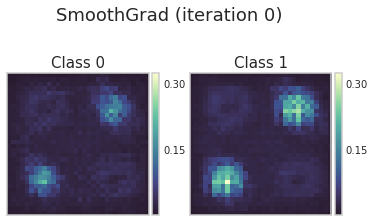

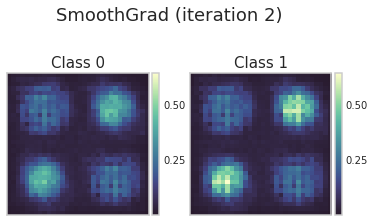

In [88]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, de_correlate_confounder_target=True, de_correlate_confounder_test=True, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])

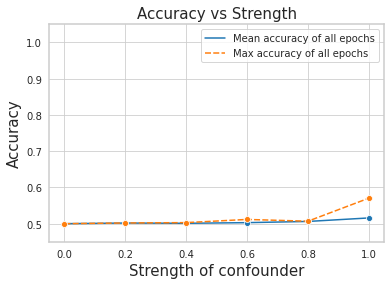

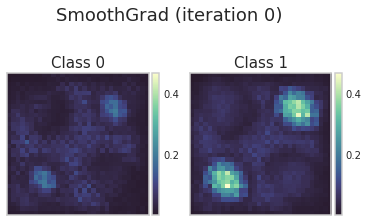

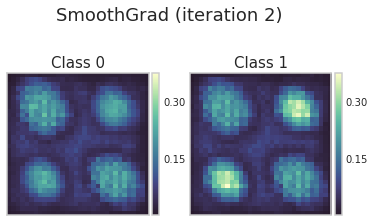

In [89]:
c = CI.confounder()
model = Models.SimpleConv_DANN()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, de_correlate_confounder_target=True, de_correlate_confounder_test=True, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])

c = CI.confounder()
model = Models.SimpleConv_CF_free_NN()
c.generate_data(mode="br_net", samples=512, overlap=20, target_domain_samples=64, target_domain_confounding=0, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), params=params)
c.train(model=model, epochs=epochs, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])